In [3]:
import numpy as np
from numpy.linalg import cholesky
import matplotlib.pyplot as plt
sampleNo = 1000

In [5]:
import random
from matplotlib import cm
from matplotlib import axes

/Users/chenzhengrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


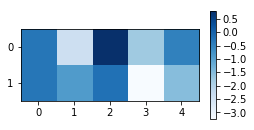

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4))
# 椭圆，但是椭圆的轴与坐标轴不一定平行
mean = [0,0]
cov = [[1,2.3],
       [2.3,1.4]] 
x,y = np.random.multivariate_normal(mean,cov,50).T
# axes.plot(x,y,'x')
X = []
X.append(x)
X.append(y)
plt.imshow(X, cmap = 'Blues')
plt.colorbar(shrink = 0.5)
plt.show()

/Users/chenzhengrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: covariance is not symmetric positive-semidefinite.


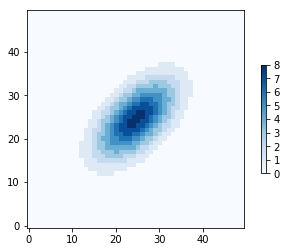

In [67]:
# 自定义的高维高斯分布概率密度函数
def gaussian(x,mean,cov):    
    dim = np.shape(cov)[0] # 维度
    covdet = np.linalg.det(cov+np.eye(dim)*0.01) # 协方差矩阵的秩
    covinv = np.linalg.inv(cov+np.eye(dim)*0.01) # 协方差矩阵的逆
    xdiff = x - mean
    # 概率密度
    prob = 1.0/np.power(2*np.pi,1.0*2/2)/np.sqrt(np.abs(covdet))*np.exp(-1.0/2*np.dot(np.dot(xdiff,covinv),xdiff))

    return prob

# 返回整型高斯值，并且是time倍的，作为矿价值
def intGaussian(x, mean, cov, times):
    prob = gaussian(x, mean, cov)
    prob = prob * times
    return prob.astype(int)


# 作二维高斯概率密度函数的热力图
mean = [0,0]
cov = [[1,2.3],
       [2.3,1.4]] 
x,y = np.random.multivariate_normal(mean,cov,500).T
cov = np.cov(x,y) # 由真实数据计算得到的协方差矩阵，而不是自己任意设定
n=50
x = np.linspace(-6,6,n)
y = np.linspace(-6,6,n)
xx,yy = np.meshgrid(x, y)
zz = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        zz[i][j] = intGaussian(np.array([xx[i][j],yy[i][j]]),mean,cov, 100)

gci = plt.imshow(zz,cmap='Blues',origin='lower') # 选项origin='lower' 防止tuixan图像颠倒
plt.colorbar(shrink = 0.5)


/Users/chenzhengrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: covariance is not symmetric positive-semidefinite.


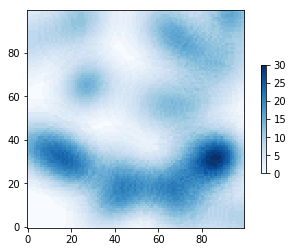

In [100]:
# def getCoefficient(N, size): 
#     covs = [0] * N
#     means = [0] * N
#     for i in range(N):
#         means[i] = np.random.rand(1, 2) * size
#         cov = np.random.rand(2, 2) * 10
#         x,y = np.random.multivariate_normal(mean, cov, 100).T
#         covs[i] = np.cov(x,y)
#     return means, covs

N = 20
n = 100
size = 100
x = np.linspace(0, size, n)
y = np.linspace(0, size, n)
xx, yy = np.meshgrid(x, y)
zz = np.zeros((n, n))
for k in range(N):
    means = np.random.rand(2) * size
    cov = (np.eye(2)*5 + np.random.randn(2, 2)) * 20
    x,y = np.random.multivariate_normal(mean, cov, 100).T
    covs = np.cov(x,y)
    for i in range(n):
        for j in range(n):
            zz[i][j] += intGaussian(np.array([xx[i][j], yy[i][j]]), means, covs, 7000)

gci = plt.imshow(zz, cmap='Blues', origin='lower')
plt.colorbar(shrink = 0.5)


In [110]:
triangle = np.ones((100, 100))
for i in range(100):
    for j in range(99, 99-i, -1):
        triangle[i][j] = 0
triangle

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [116]:
a = np.eye(100)
a

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [117]:
triMine = np.eye(100)
for i in range(100):
    for j in range(100):
        triMine[i][j] = zz[i][j] * triangle[i][j]
triMine

array([[0., 0., 0., ..., 8., 8., 9.],
       [0., 0., 0., ..., 9., 9., 0.],
       [0., 0., 0., ..., 9., 0., 0.],
       ...,
       [4., 4., 5., ..., 0., 0., 0.],
       [4., 4., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

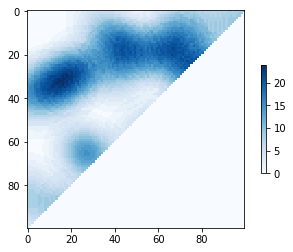

In [120]:
gci = plt.imshow(triMine, cmap='Blues')
plt.colorbar(shrink = 0.5)

In [142]:
def dpminer(mine, size):
    # 初始化
    maxValue = np.zeros([size, size])
    maxWay = np.zeros([size, size])
    maxMoney = 0

    # 计算达到最大值经过的每一个子问题
    for i in range(size):
        maxValue[size - 1 - i][i] = mine[size - 1 - i][i]
    for i in range(size - 2, -1, -1):
        for j in range(i+1):
            maxValue[i - j][j] = mine[i - j][j] + max(maxValue[i - j + 1][j], maxValue[i - j][j + 1])

    # 计算达到最大值所需要经过的点
    maxWay[0][0] = 1
    j = 0
    k = 0
    for i in range(size - 1):
        if maxValue[j + 1][k] > maxValue[j][k + 1]:
            maxWay[j + 1][k] = 1
            j = j + 1
        else:
            maxWay[j][k + 1] = 1
            k = k + 1

    # 计算最大价值
    maxMoney = maxValue[0][0]

    return maxMoney, maxWay, maxValue


In [143]:
maxMoney, maxWay, maxValue = dpminer(triMine, n)

In [144]:
maxValue

array([[1244., 1244., 1244., ...,   26.,   17.,    9.],
       [1241., 1241., 1241., ...,   18.,    9.,    0.],
       [1240., 1240., 1240., ...,    9.,    0.,    0.],
       ...,
       [  13.,    9.,    5., ...,    0.,    0.,    0.],
       [   8.,    4.,    0., ...,    0.,    0.,    0.],
       [   3.,    0.,    0., ...,    0.,    0.,    0.]])

In [145]:
maxWay

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

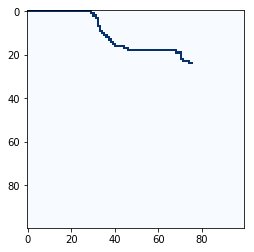

In [146]:
plt.imshow(maxWay, cmap='Blues')
plt.show()

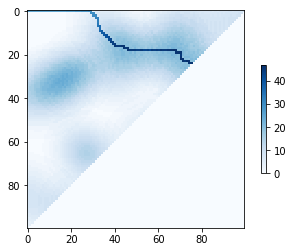

In [147]:
combine = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        combine[i][j] = maxWay[i][j] * 25 + triMine[i][j]
plt.imshow(combine, cmap='Blues')
plt.colorbar(shrink = 0.5)
plt.show()

In [155]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colorbar
import matplotlib.colors

In [156]:
def cuboid_data(center, size=(1,1,1)):
    # code taken from
    # http://stackoverflow.com/questions/30715083/python-plotting-a-wireframe-3d-cuboid?noredirect=1&lq=1
    # suppose axis direction: x: to left; y: to inside; z: to upper
    # get the (left, outside, bottom) point
    o = [a - b / 2 for a, b in zip(center, size)]
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in bottom surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in upper surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  # x coordinate of points in outside surface
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  # x coordinate of points in inside surface
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in bottom surface
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  # y coordinate of points in upper surface
         [o[1], o[1], o[1], o[1], o[1]],          # y coordinate of points in outside surface
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]    # y coordinate of points in inside surface
    z = [[o[2], o[2], o[2], o[2], o[2]],                        # z coordinate of points in bottom surface
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],    # z coordinate of points in upper surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],                # z coordinate of points in outside surface
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]                # z coordinate of points in inside surface
    return x, y, z

In [157]:
def plotCubeAt(pos=(0,0,0), c="b", alpha=0.1, ax=None):
    # Plotting N cube elements at position pos
    if ax != None:
        X, Y, Z = cuboid_data( (pos[0],pos[1],pos[2]) )
        X = np.array(X)
        Y = np.array(Y)
        Z = np.array(Z)
        ax.plot_surface(X, Y, Z, color=c, rstride=1, cstride=1, alpha=0.1)

In [158]:
def plotMatrix(ax, x, y, z, data, cmap="jet", cax=None, alpha=0.05):
    # plot a Matrix 
    norm = matplotlib.colors.Normalize(vmin=data.min(), vmax=data.max())
    colors = lambda i,j,k : matplotlib.cm.ScalarMappable(norm=norm,cmap = cmap).to_rgba(data[i,j,k]) 
    for i, xi in enumerate(x):
            for j, yi in enumerate(y):
                for k, zi, in enumerate(z):
                    plotCubeAt(pos=(xi, yi, zi), c=colors(i,j,k), alpha=alpha,  ax=ax)



    if cax !=None:
        cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap,
                                norm=norm,
                                orientation='vertical')  
        cbar.set_ticks(np.unique(data))
        # set the colorbar transparent as well
        cbar.solids.set(alpha=alpha)              


(50, 25, 25)


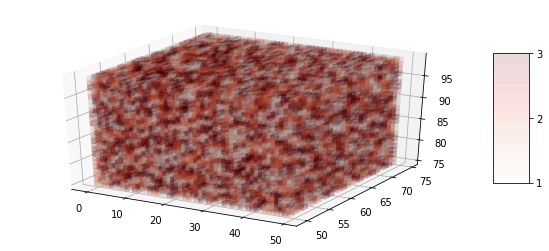

In [159]:
x = np.array(range(50))
y = np.array(range(50,75))
z = np.array(range(75,100))

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.8], projection='3d')
ax_cb = fig.add_axes([0.8, 0.3, 0.05, 0.45])
ax.set_aspect('equal')

plotMatrix(ax, x, y, z, data_value, cmap="Reds", cax = ax_cb)
plt.show()

In [170]:
# 三维高斯
mean = [0,0,0]
cov = [[1,   2.3,   1],
       [2.3, 1.4, 1.1],
       [2.1,   1,   1]] 
x,y,z = np.random.multivariate_normal(mean,cov,500).T
cov = np.cov([x,y,z]) # 由真实数据计算得到的协方差矩阵，而不是自己任意设定
n=50
x = np.linspace(-6,6,n)
y = np.linspace(-6,6,n)
z = np.linspace(-6,6,n)
xx,yy,zz= np.meshgrid(x, y, z)
aa = np.zeros((n,n,n))
for i in range(n):
    for j in range(n):
        for k in range(n):
            aa[i][j][k] = intGaussian(np.array([xx[i][j][k],yy[i][j][k],zz[i][j][k]]),mean,cov,1000)

/Users/chenzhengrui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


In [171]:
aa.max()

235.0

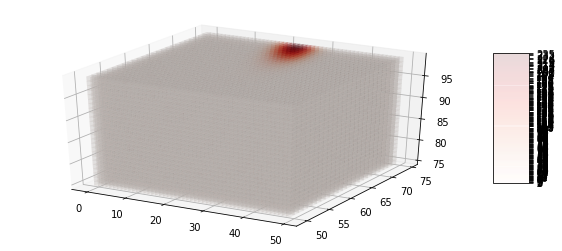

In [172]:
# 绘制一个简单的三维高斯HeatMap
x = np.array(range(50))
y = np.array(range(50,75))
z = np.array(range(75,100))

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.8], projection='3d')
ax_cb = fig.add_axes([0.8, 0.3, 0.05, 0.45])
ax.set_aspect('equal')

plotMatrix(ax, x, y, z, aa, cmap="Reds", cax = ax_cb)
plt.show()

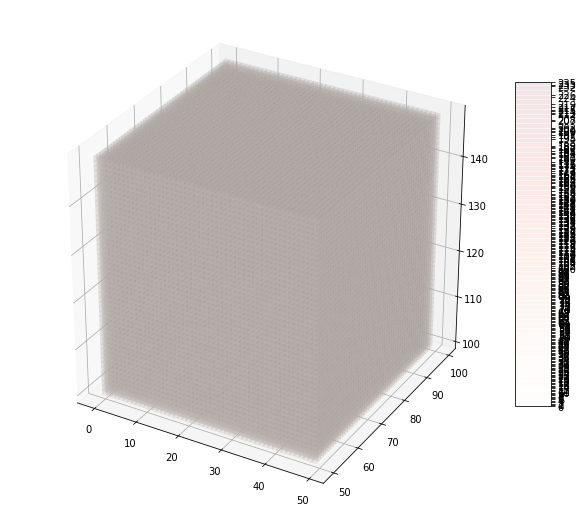

In [174]:
x = np.array(range(50))
y = np.array(range(50, 100))
z = np.array(range(100, 150))

fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.8], projection='3d')
ax_cb = fig.add_axes([0.8, 0.3, 0.05, 0.45])
ax.set_aspect('equal')

plotMatrix(ax, x, y, z, aa, cmap="Reds", cax = ax_cb)
plt.show()

In [ ]:
N = 15
n = 50
size = 50
x = np.linspace(0, size, n)
y = np.linspace(0, size, n)
z = np.linspace(0, size, n)
xx, yy, zz = np.meshgrid(x, y, z)
bb = np.zeros((n, n, n))
for l in range(N):
    means = np.random.rand(3) * size
    cov = (np.eye(3)*5 + np.random.randn(2, 2)) * 20
    x,y,z = np.random.multivariate_normal(mean, cov, 50).T
    covs = np.cov([x,y,z])
    for i in range(n):
        for j in range(n):
            for k in range(n):
                bb[i][j][k] += intGaussian(np.array([xx[i][j][k], yy[i][j][k], z[i][j][k]]), means, covs, 10000)

In [ ]:
x = np.array(range(50))
y = np.array(range(50, 100))
z = np.array(range(100, 150))
fig = plt.figure(figsize = (10, 10))
ax = fig.add_axes([0.1, 0.1, 0.7, 0.8], projection='3d')
ax_cb = fig.add_axes([0.8, 0.3, 0.05, 0.45])
ax.set_aspect('equal')

plotMatrix(ax, x, y, z, bb, cmap="Reds", cax = ax_cb)
plt.show()

In [ ]:
np.random.randn(2,2,2)